# <font color='brown'>楼 + 机器学习实战</font>

# 挑战：使用 Mini Batch K-Means 进行图像压缩

## 挑战介绍

本次挑战将针对一张成都著名景点：锦里的图片，通过 Mini Batch K-Means 的方法将相近的像素点聚合后用同一像素点代替，以达到图像压缩的效果。

## 挑战知识点

- 图像处理
- Mini Batch K-Means 图像聚类

---

## 挑战内容

### 图像导入

首先，我们下载并导入示例图片，图片名为 `challenge-7-chengdu.png`。

In [1]:
!wget http://labfile.oss.aliyuncs.com/courses/1081/challenge-7-chengdu.png

--2018-08-13 16:16:38--  http://labfile.oss.aliyuncs.com/courses/1081/challenge-7-chengdu.png
Resolving labfile.oss.aliyuncs.com (labfile.oss.aliyuncs.com)... 118.178.161.16
Connecting to labfile.oss.aliyuncs.com (labfile.oss.aliyuncs.com)|118.178.161.16|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1057505 (1.0M) [image/png]
Saving to: ‘challenge-7-chengdu.png’

challenge-7-chengdu 100%[===================>]   1.01M   651KB/s    in 1.6s    

2018-08-13 16:16:40 (651 KB/s) - ‘challenge-7-chengdu.png’ saved [1057505/1057505]



使用 Matplotlib 可视化示例图片。

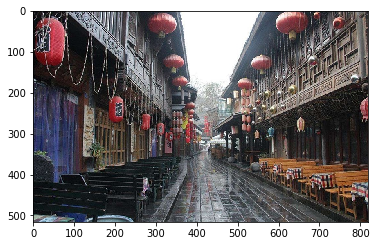

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg 

chengdu = mpimg.imread('challenge-7-chengdu.png') # 将图片加载为 ndarray 数组
plt.imshow(chengdu) # 将数组还原成图像

In [3]:
chengdu.shape

(516, 819, 3)

在使用 `mpimg.imread` 函数读取图片后，实际上返回的是一个 `numpy.array` 类型的数组，该数组表示的是一个像素点的矩阵，包含长，宽，高三个要素。如成都锦里这张图片，总共包含了 $516$ 行，$819$ 列共 $516*819=422604$ 个像素点，每一个像素点的高度对应着计算机颜色中的三原色 $R, G, B$（红，绿，蓝），共 3 个要素构成。

### 数据预处理

为方便后期的数据处理，需要对数据进行降维。

**<font color='red'>挑战</font>：将形状为 $(516, 819, 3)$ 的数据转换为 $(422604, 3)$ 形状的数据。**

**<font color='green'>提示</font>**：使用 `np.reshape` 进行数据格式的变换。

In [4]:
"""数据格式变换
"""
### 代码开始 ###(≈ 1 行代码)
data = chengdu.reshape(516 * 819, 3)
### 代码结束 ###

**运行测试：**

In [5]:
data.shape, data[10]

((422604, 3), array([0.12941177, 0.13333334, 0.14901961], dtype=float32))

**期望输出：**

<center>`((422604, 3), array([0.12941177, 0.13333334, 0.14901961], dtype=float32))`</center>

### 像素点种类个数计算

尽管有 `422604` 个像素点，但其中仍然有许多相同的像素点。在此我们定义：$R, G, B$ 值相同的点为一个种类，其中任意值不同的点为不同种类。

**<font color='red'>挑战</font>：计算 `422604` 个像素点中种类的个数。 **

**<font color='green'>提示</font>**：提供一个思路：可以将数据转化为 list 类型，然后将每一个元素转换为 tuple 类型，最后利用 `set()` 和 `len()` 函数进行计算。也可以按照自己的想法完成。

Python 中，`list, set, dict` 是不可 unhashable 的，三者使用 hash 值进行索引，也要求存储的元素是 hashable。而只有 `int, float, str, tuple` 是可以 hashable 的。

In [6]:
"""计算像素点种类个数
"""
def get_variety(data):
    """
    参数:
    预处理后像素点集合

    返回:
    num_variety -- 像素点种类个数
    """

    ### 代码开始 ### (≈ 3 行代码)
    temp = data.tolist()
    num_variety = len(set([tuple(t) for t in temp]))
    ### 代码结束 ###
    
    return num_variety

**运行测试：**

In [7]:
get_variety(data), data[20]

(100109, array([0.24705882, 0.23529412, 0.2627451 ], dtype=float32))

**期望输出：**

<center>`(100109, array([0.24705882, 0.23529412, 0.2627451 ], dtype=float32))`</center>

### Mini Batch K-Means 聚类

像素点种类的数量是决定图片大小的主要因素之一，在此使用 Mini Batch K-Means 的方式将图片的像素点进行聚类，将相似的像素点用同一像素点值来代替，从而降低像素点种类的数量，以达到压缩图片的效果。

**<font color='red'>挑战</font>：使用 Mini Batch K-Means 聚类方法对像素点进行聚类，并用每一个中心的像素点代替属于该类别的像素点。 **

**<font color='brown'>要求</font>**：聚类簇数量设置为 10 类。

**<font color='green'>提示</font>**：使用 `MiniBatchKMeans` 中 `fit()` 和 `predict()` 函数进行聚类，使用 `cluster_centers_()`函数进行替换，阅读 [官方文档](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html)，本次挑战基本使用默认参数。

In [8]:
from sklearn.cluster import MiniBatchKMeans

### 代码开始 ###（≈ 4 行代码）
model = MiniBatchKMeans(10)
model.fit(data)
predict = model.predict(data)
### 代码结束 ###

new_colors = model.cluster_centers_[predict]

**运行测试：**

In [9]:
# 调用前面实现计算像素点种类的函数，计算像素点更新后种类的个数
get_variety(new_colors)

10

**期望输出：**

<center>`10`</center>

### 图像压缩前后展示

**<font color='red'>挑战</font>**：将聚类后并替换为类别中心点值的像素点，变换为数据处理前的格式，并绘制出图片进行对比展示。 

**<font color='green'>提示</font>**：使用 `reshape()` 函数进行格式变换，使用 `imshow()`函数进行绘图。

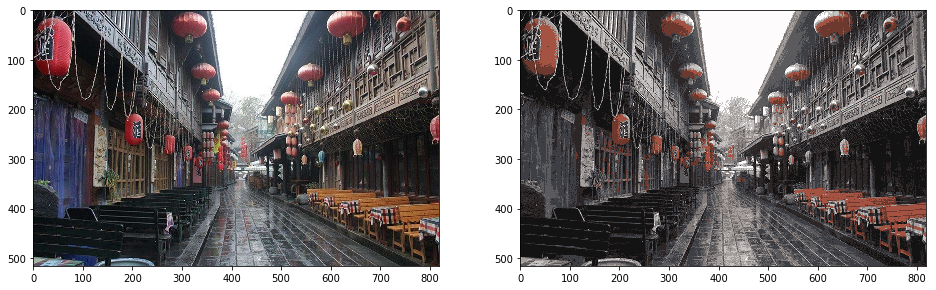

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

### 代码开始 ###（≈ 3 行代码）
new_chengdu = new_colors.reshape(chengdu.shape)
ax[0].imshow(chengdu)
ax[1].imshow(new_chengdu)
### 代码结束 ###

**运行测试：**

**期望输出：**

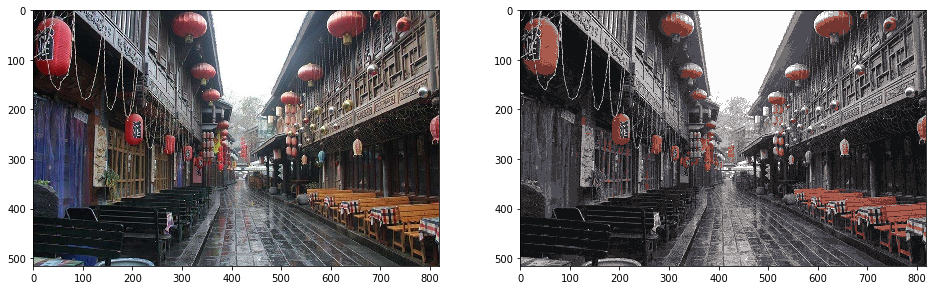

通过图片对比，可以十分容易发现画质被压缩了。其实，因为使用了聚类，压缩后的图片颜色就变为了 10 种。

接下来，使用 `mpimg.imsave()` 函数将压缩好的文件进行存储，并对比压缩前后图像的体积变化。

In [11]:
# 运行对比
mpimg.imsave("new_chengdu.png",new_chengdu)
!du -h new_chengdu.png
!du -h challenge-7-chengdu.png

208K	new_chengdu.png
1.1M	challenge-7-chengdu.png


可以看到，使用 Mini Batch K-Means 聚类方法对图像压缩之后，体积明显缩小。

---

<div style="color: #999;font-size: 12px;font-style: italic;">*本课程内容，由作者授权实验楼发布，未经允许，禁止转载、下载及非法传播。</div>